# **AI_Generated VS Real Image Classifier**

## Data Preprocessing

In [1]:
# Importing all necessary libraries

import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

2024-08-21 18:31:48.518305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 18:31:48.518462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 18:31:48.589912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 18:31:48.728208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 18:31:50.600264: W tensorflow/compiler/tf2

In [2]:
# Checking for gpus

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-08-21 18:31:57.198643: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:31:57.450781: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:31:57.450908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# pip install opencv-python

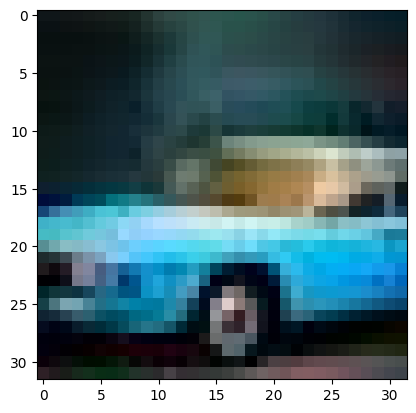

In [4]:
# reading a single image

img = cv2.imread(os.path.join('data/Test', 'FAKE', '1001 (2).jpg'))
plt.imshow(img)

## Loading dataset

In [5]:
# creating datagen object
# this object will perform image segmentations

train_datagen = ImageDataGenerator(  rotation_range=20,        
                                    width_shift_range=0.2,    
                                    height_shift_range=0.2,   
                                    shear_range=0.2,          
                                    zoom_range=0.2,           
                                    horizontal_flip=True,     
                                    brightness_range=[0.8, 1.2],     
                                    fill_mode='nearest',
                                    rescale = 1./255,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
# creating pipelines for train, test and validation datasets

train_data = train_datagen.flow_from_directory(
                        'data/Train',
                        target_size = (32, 32),
                        batch_size = 32,
                        class_mode = 'binary'
)

test_data = test_datagen.flow_from_directory(
                        'data/Test',
                        target_size = (32, 32),
                        batch_size = 32,
                        class_mode = 'binary'
)


Found 89988 images belonging to 2 classes.
Found 10008 images belonging to 2 classes.


In [7]:
# checking for a single batch

batch = train_data[0]
print(batch[0].min())

0.0


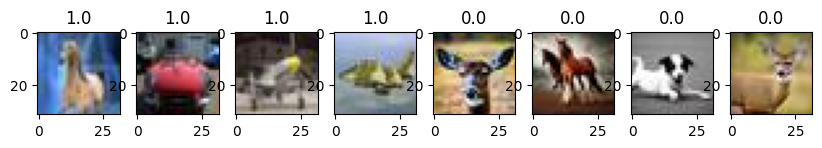

In [8]:
# Plotting eight images from batch

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

## Model Building

In [9]:
# importing necessary libraries for model building 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import GlobalAveragePooling2D

In [10]:
# # building my own CNN architecture

# model = Sequential()

# model.add(Conv2D(16, (3,3), 1, activation='relu', padding='same', input_shape=(32,32,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
# model.add(MaxPooling2D())

# model.add(Conv2D(64, (2,2), 1, activation='relu', padding='same'))
# model.add(MaxPooling2D())

# # model.add(Conv2D(64, (2,2), 1, activation='relu', padding='same'))
# # model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001)))
# model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))


In [11]:
# # model summary

# model.summary()

In [12]:
# applying transfer learning by using pretrained EfficientNetB6 model

from tensorflow.keras.applications import EfficientNetB2

base_model = EfficientNetB2(weights='imagenet', include_top=False, classifier_activation='sigmoid', 
                            classes=2, input_shape=(32, 32, 3))

model = Sequential() 
model.add(base_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

2024-08-21 18:32:06.179752: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:32:06.179899: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:32:06.179972: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:32:07.400406: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-21 18:32:07.400511: I external/local_xla/xla/stream_executor

In [13]:
# making weights of layers of base model trainable    

base_model.trainable = True

In [14]:
# checking model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 1, 1, 1408)        7768569   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                90176     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [15]:
# defining callbacks 
# checkpoint callback stores best weights

checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_binary_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)


In [16]:
# compiling model

model.compile(optimizer=Adam(learning_rate=0.000042), loss = BinaryCrossentropy(), metrics=[BinaryAccuracy(), Precision(), Recall()])

In [17]:
# training model and saving logs in hist

hist = model.fit(x=train_data, epochs=15, validation_data=test_data, callbacks=[checkpoint])

Epoch 1/15


2024-08-21 18:32:36.305147: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-21 18:32:41.666772: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-21 18:32:42.293514: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-08-21 18:32:42.666966: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-21 18:32:45.389446: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7a340565a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-21 18:32:45.389510: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): N

2813/2813 [==============================] - ETA: 0s - loss: 0.5524 - binary_accuracy: 0.7242 - precision: 0.7225 - recall: 0.7282
Epoch 1: val_binary_accuracy improved from -inf to 0.55985, saving model to best_model.h5
2813/2813 [==============================] - 499s 156ms/step - loss: 0.5524 - binary_accuracy: 0.7242 - precision: 0.7225 - recall: 0.7282 - val_loss: 0.8610 - val_binary_accuracy: 0.5599 - val_precision: 0.7986 - val_recall: 0.1601
Epoch 2/15
2813/2813 [==============================] - ETA: 0s - loss: 0.3652 - binary_accuracy: 0.8393 - precision: 0.8376 - recall: 0.8417
Epoch 2: val_binary_accuracy did not improve from 0.55985
2813/2813 [==============================] - 438s 156ms/step - loss: 0.3652 - binary_accuracy: 0.8393 - precision: 0.8376 - recall: 0.8417 - val_loss: 0.9583 - val_binary_accuracy: 0.5370 - val_precision: 0.9057 - val_recall: 0.0825
Epoch 3/15
2813/2813 [==============================] - ETA: 0s - loss: 0.2818 - binary_accuracy: 0.8818 - precis

In [18]:
# loading best weights of model 

model.load_weights('best_model.h5')

## Model Evaluation

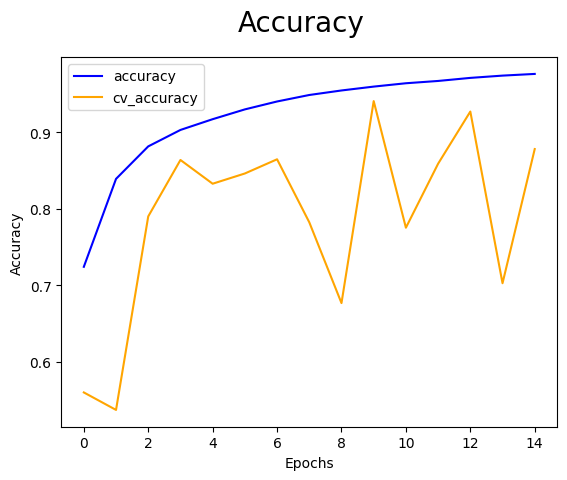

In [19]:
# Plotting accuracy of model

fig = plt.figure()
plt.plot(hist.history['binary_accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_binary_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

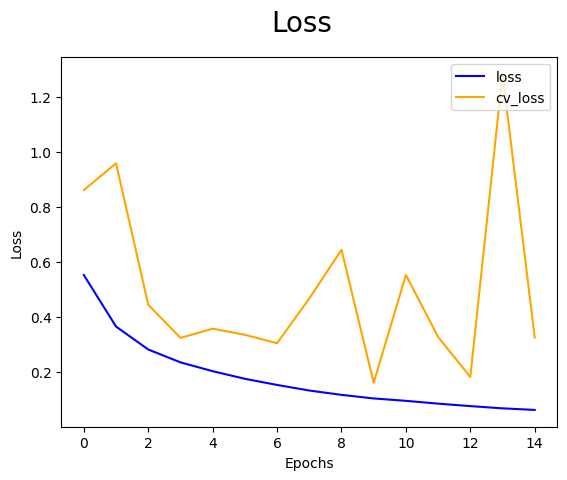

In [20]:
# plotting loss of model

fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [165]:
# precision, recall and Accuracy
results = model.evaluate(test_data, steps=(test_data.samples // test_data.batch_size)+1)

# Print out the results
print(f"Test Loss: {results[0]}")
print(f"Test Binary_accuracy: {results[1]}")
print(f"Test Precision: {results[2]}")
print(f"Test Recall: {results[3]}")


313/313 [==============================] - 9s 30ms/step - loss: 0.1608 - binary_accuracy: 0.9410 - precision: 0.9450 - recall: 0.9367
Test Loss: 0.16084866225719452
Test Binary_accuracy: 0.941047191619873
Test Precision: 0.9449597001075745
Test Recall: 0.9366506934165955


In [26]:
# saving model

model.save('my_model.h5')

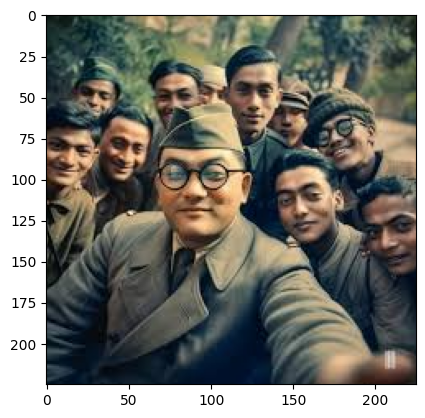

In [167]:
# making prediction on a single image which is a real image

img = cv2.imread('img/ai_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [168]:
# resizing test image

resize = tf.image.resize(img, (32, 32))

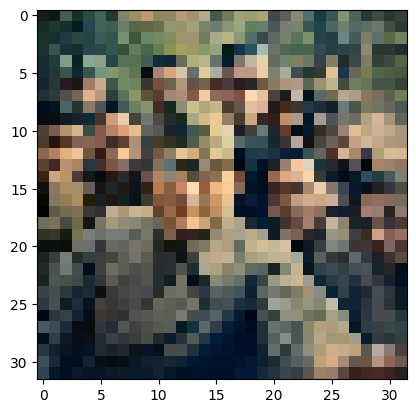

In [169]:
# image after resizing

plt.imshow(resize/255)

In [170]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


In [171]:
y_pred

array([[0.24008614]], dtype=float32)

In [172]:
if y_pred > 0.4: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI
